# Median Income and Snap
I wanted to continue practicing creating maps with various data collected from the census. This data looks at the median income of households that receive SNAP and those who don't. I am interested to see where in the United States has higher median income levels and how that correlates to SNAP enrollment.  

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [5]:
Median = gpd.read_file('Median Income and SNAP.geojson')

In [6]:
Median.shape

(51, 9)

In [7]:
Median.head()

,geoid,name,B22008001,"B22008001, Error",B22008002,"B22008002, Error",B22008003,"B22008003, Error",geometry
0,04000US01,Alabama,51734.0,600.0,18515.0,930.0,58142.0,906.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,75463.0,2694.0,28182.0,3284.0,81995.0,2016.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,62055.0,446.0,27837.0,1569.0,66467.0,545.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,48952.0,863.0,18742.0,1300.0,53544.0,1134.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,80440.0,313.0,32039.0,584.0,85628.0,403.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


In [8]:
columns_to_keep = ['geoid',
 'name',
 'B22008001',
 'B22008002',
 'B22008003',
 'geometry']

In [9]:
Median = Median[columns_to_keep]

In [10]:
Median.columns = ['geoid',
 'name',
 'Total',
 'Household received Food Stamps/SNAP in the past 12 months',
 'Household did not receive Food Stamps/SNAP in the past 12 months',
 'geometry']

In [11]:
Median.head()

,geoid,name,Total,Household received Food Stamps/SNAP in the past 12 months,Household did not receive Food Stamps/SNAP in the past 12 months,geometry
0,04000US01,Alabama,51734.0,18515.0,58142.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,75463.0,28182.0,81995.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,62055.0,27837.0,66467.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,48952.0,18742.0,53544.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,80440.0,32039.0,85628.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


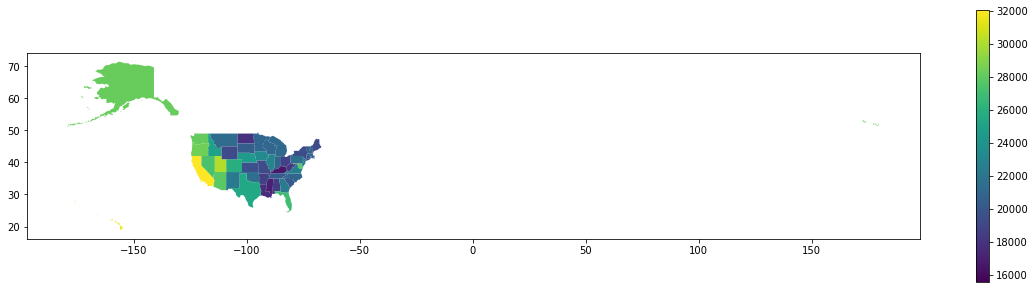

In [16]:
Median.plot(figsize= (20,5), column='Household received Food Stamps/SNAP in the past 12 months',legend=True)

Text(0.5, 1.0, 'Median income of Household that did not receive Food Stamps/SNAP in the past 12 months')

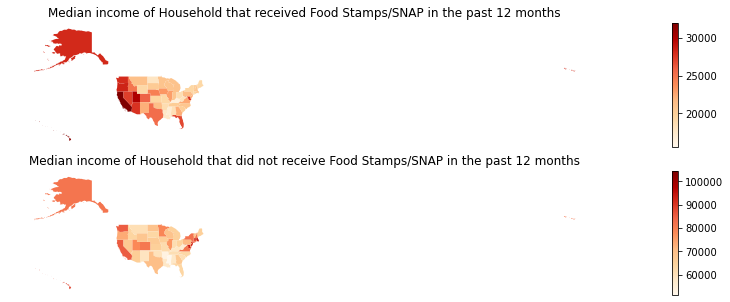

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(25,5))

# name each subplot
ax1, ax2 = axs

# regular count map on the top
Median.plot(column='Household received Food Stamps/SNAP in the past 12 months', 
            cmap='OrRd',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=1, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Median income of Household that received Food Stamps/SNAP in the past 12 months")

# spatial lag map on the bottom
Median.plot(column='Household did not receive Food Stamps/SNAP in the past 12 months', 
            cmap='OrRd', 
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Median income of Household that did not receive Food Stamps/SNAP in the past 12 months")

This practice helped me to understand How Ican arrange the maps in Python. These maps definitely show the where the median income levels are the highest in the United States. It also shows how different the income levels between these two demographic categories are.

In [26]:
Median['Percent Household received Food Stamps/SNAP in the past 12 months'] = Median ['Household received Food Stamps/SNAP in the past 12 months'] / Median['Total']*100
Median['Percent Household did not receive Food Stamps/SNAP in the past 12 months'] = Median ['Household did not receive Food Stamps/SNAP in the past 12 months'] / Median['Total']*100

Text(0.5, 1.0, 'Percent Median income of Household that did not receive Food Stamps/SNAP in the past 12 months')

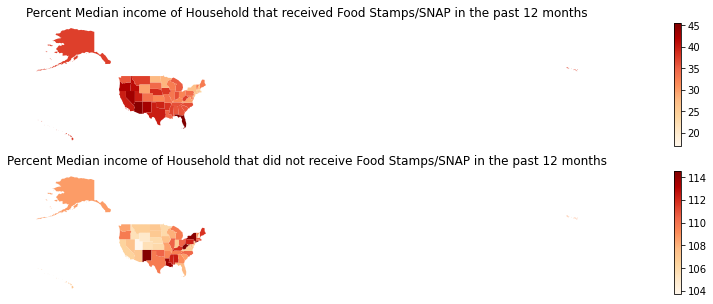

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(25,5))

# name each subplot
ax1, ax2 = axs

# regular count map on the top
Median.plot(column='Percent Household received Food Stamps/SNAP in the past 12 months', 
            cmap='OrRd',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=1, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Median income of Household that received Food Stamps/SNAP in the past 12 months")

# spatial lag map on the bottom
Median.plot(column='Percent Household did not receive Food Stamps/SNAP in the past 12 months', 
            cmap='OrRd', 
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Median income of Household that did not receive Food Stamps/SNAP in the past 12 months")

The percent median income of households without SNAP compared to the total, demonstrate that they are all above the total median income level in the United States. It appears the north eastern states are more wealthy and do not depend on SNAP as much as other states. However, those in the north east that do have SNAP are significantly less wealthy than those who do not receive SNAP.